# 1. Overview

The primary goal of this project is to evaluate the performance of various Convolutional Neural Network (CNN) architectures for binary image classification with restricted sample numbers. The project uses the Dogs vs Cats dataset from Kaggle, a popular dataset in the field of computer vision, where the objective is to classify images as either "dog" or "cat."

## 1.1 Dataset Description

The original Dogs vs Cats dataset will be reduced to 4.000 labeled images with an equal distribution between the two classes (2.000 images each for dogs and cats), resulting in a balanced dataset. The images have diverse lighting, backgrounds, and poses, which adds to the challenge of accurate classification. The dataset is split into three subsets:

- **Training Set:** 2.000 images (1.000 for each class)
- **Validation Set:** 1000 images (500 for each class)
- **Test Set:** 1.000 images (500 for each class)

The dataset split aims to ensure that the model is evaluated fairly on unseen data while using a sufficient number of images for training and validation.

The best model will be chosen from several candidate models and re-trainid on the following datasets:
- **Training Set:** 3.000 images (1.500 for each class)
- **Test Set:** 1.000 images (500 for each class)

## 1.2 Objectives

1. Experiment with multiple CNN architectures to classify images of dogs and cats.
2. Evaluate and compare the performance of these architectures in terms of accuracy, precision, recall, F1-score, and AUC.
3. Identify the architecture that achieves the best performance in terms of generalization and accuracy on the test set.

## 1.3 Methodology

### 1.3.1 Data Preprocessing and Augmentation:
- **Resizing:** All images are resized to a fixed dimension (e.g., 150x150) to ensure consistency across architectures.
- **Normalization:** Pixel values are scaled to the range [0, 1] to improve convergence during training.
- **Data Augmentation:** Random transformations, such as horizontal flips, rotations, zooms, and shifts, are applied to the training images. This helps enhance the model’s ability to generalize by learning from varied versions of each image, especially given the relatively small dataset size.

### 1.3.2 CNN Architectures
The project evaluates several CNN architectures to determine which best captures features for this binary classification task:

- **Baseline CNN**: A simple CNN architecture with a few convolutional and pooling layers to establish baseline performance.
- **Deeper Custom CNNs**: Architectures with more convolutional layers, using dropout and batch normalization to prevent overfitting.
- **Transfer Learning Models:** Pre-trained CNN architectures, including VGG16, ResNet50, and MobileNetV2, fine-tuned on the Dogs vs Cats dataset. Transfer learning enables the use of knowledge from large-scale datasets (e.g., ImageNet) to improve performance and reduce training time.

### 1.3.3  Hyperparameter tuning
An automated hyperparameter tuner will be used to optimize parameters:

- Learning rate
- Batch size
- Number of epochs
- Optimizer type (e.g., SGD, Adam)
- Dropout rate
    
### 1.3.4  Evaluation Metrics
Each model's performance is assessed using:
- **Accuracy:** The overall percentage of correct predictions.
- **F1-Score:** The harmonic mean of precision and recall, providing a balanced view of performance, especially if misclassifying one class is more costly.
- **AUC-ROC:** Measures the model’s ability to distinguish between the two classes across all classification thresholds.
- **Precision:** The proportion of true positive predictions among all positive predictions, measuring the model's exactness.
- **Loss:** The value of the loss function (e.g., binary cross-entropy) during training, indicating how well the model fits the data.
- **Recall:** The proportion of true positive predictions among all actual positive samples, measuring the model’s ability to capture all relevant instances.

### 1.3.5  Training Process
Each model is trained on the training dataset using a fixed number of epochs, and performance is monitored on the validation set to prevent overfitting. Hyperparameters are tuned based on validation performance to ensure fair comparisons. Early stopping is implemented to terminate training if validation performance stagnates or deteriorates.

### 1.3.6 Testing and Comparison
After training, the final model for each architecture is evaluated on the test set to determine its generalization performance.
Results are analyzed and compared across architectures to identify the model that performs best by evaluating:

- **Primary Metric: F1-Score** which balances precision and recall, ensuring good performance on both classes. This is important because the model might face challenges due to the dataset’s variability (e.g., diverse lighting and poses).
- **Secondary Metrics: AUC-ROC and Accuracy** to ensure the model can effectively separate the two classes across all thresholds and the accuracy for an overall view of the model's performance.

## 1.4 Expected Outcomes
- A comprehensive comparison of CNN architectures for binary image classification on the Dogs vs Cats dataset.
- Identification of the most effective architecture in terms of both accuracy and generalization.
- Insights into the impact of data augmentation and transfer learning on small datasets in binary classification tasks.

---

# 2. System setup

This notebook was created using Python 3.12. Python versions 3.8 and newer should work as well, though they have not been specifically tested with this project.

## 2.1 Install python
Download and install Python 3.12 from python.org. It is highly recommended to create a separate virtual environment for this project to avoid potential dependency conflicts between libraries.

### 2.1.1 Creating a Python Virtual Environment on Windows (optional)
To create a virtual environment on Windows, open PowerShell or Command Prompt and run the following command: </br>
**python -m venv C:\path\to\new\virtual\environment** </br>
Replace C:\path\to\new\virtual\environment with the actual path where you would like to create the virtual environment.

### 2.1.2 Creating a Python Virtual Environment on Linux (optional)
On Linux, start by installing the venv module (if it’s not already installed) to enable virtual environment creation: </br>
**sudo apt-get install python3-venv**

Then, create the virtual environment by running: </br>
**python3 -m venv path/to/new/virtual/environment** </br>
Replace /path/to/new/virtual/environment with your preferred location for the virtual environment.

## 2.2 Install third-party libraries
If you are using a virtual anvironment on Linux, this must be activated first by running: </br>
**source /path/to/new/virtual/environment/bin/activate**

If you are using a virtual anvironment on Windows, this must be activated first by running: </br>
**path/to/new/virtual/environment/Scripts/activate**

To install the necessary third-party libraries, run the following command from the project’s root directory, where the requirements.txt file is located: </br>
**pip install -r requirements.txt**

## 2.3 Install NVIDIA Tools (Optional)
If you wish to leverage hardware-accelerated computations on an NVIDIA GPU (useful for training and optimizing dense neural networks), you will need to install the appropriate NVIDIA drivers and software suite. If an NVIDIA GPU is not available, or if you choose not to use GPU acceleration, the neural network computations will default to the CPU, though this may result in slower performance.

### 2.3.1 Install nVidia CUDA
To install CUDA, follow these steps:
1. Visit the page: https://developer.nvidia.com/cuda-downloads
2. Run the following commands to download and install CUDA 12.6.2 for Ubuntu 24.04: </br>
wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2404/x86_64/cuda-ubuntu2404.pin <br>
sudo mv cuda-ubuntu2404.pin /etc/apt/preferences.d/cuda-repository-pin-600 <br>
get https://developer.download.nvidia.com/compute/cuda/12.6.2/local_installers/cuda-repo-ubuntu2404-12-6-local_12.6.2-560.35.03-1_amd64.deb <br>
sudo dpkg -i cuda-repo-ubuntu2404-12-6-local_12.6.2-560.35.03-1_amd64.deb <br>
sudo cp /var/cuda-repo-ubuntu2404-12-6-local/cuda-*-keyring.gpg /usr/share/keyrings/ <br>
sudo apt-get update <br>
sudo apt-get -y install cuda-toolkit-12-6 <br>

**Note:** CUDA must be installed before cuDNN, as cuDNN relies on CUDA during installation.

### 2.3.2 Install NVIDIA cuDNN
To enable deeper GPU optimizations for neural network training, you’ll need to install cuDNN after CUDA:

1. Visit the: https://developer.nvidia.com/cudnn-downloads
2. Run the following commands to install cuDNN 9.5.0 for Ubuntu 24.04: </br>
wget https://developer.download.nvidia.com/compute/cudnn/9.5.0/local_installers/cudnn-local-repo-ubuntu2404-9.5.0_1.0-1_amd64.deb <br>
sudo dpkg -i cudnn-local-repo-ubuntu2404-9.5.0_1.0-1_amd64.deb <br>
sudo cp /var/cudnn-local-repo-ubuntu2404-9.5.0/cudnn-*-keyring.gpg /usr/share/keyrings/ <br>
sudo apt-get update <br>
sudo apt-get -y install cudnn <br>

After completing these steps, you’ll be set up to take advantage of GPU acceleration for deep learning models with compatible NVIDIA hardware.

In [3]:
# import standard libs
import os
import itertools
from os.path import join
from glob import glob

# Note that Keras should only be imported after the backend
# has been configured. The backend cannot be changed once the
# package is imported.
os.environ["KERAS_BACKEND"] = "tensorflow"

# third party libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import models, layers
from keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import mixed_precision, regularizers
from keras.utils import to_categorical, image_dataset_from_directory
from keras.ops import sigmoid
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, roc_auc_score
)

# local custom libs
from classifier import System
from classifier.image import Sampler, BinaryClassifier
from classifier.utils import (
    read_image, plot_confusion_matrix, binarize_predictions,
    plot_performance_metrics, find_optimal_threshold, save_model,
    augment_training_data, get_data_labels, create_batch_generators,
    plot_prediction, print_performance_metrics
)

# plots will be printed in the notebook
%matplotlib inline

System.configure_gpu_allocation(limit=3072) # attempt to allocate as much memory as possible
System.print_info()

Tensorflow will use 3072 MB of all GPU memory.
System Information:
-------------------
Keras Backend: tensorflow
Tensorflow log level: 1
CPUs Available: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
GPUs Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
-------------------


# 2 CNN Architectures
## 2.1 Baseline CNN model - sampling, compilation and training

Found 2000 files belonging to 2 classes.


I0000 00:00:1731774463.095513   18846 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Epoch 1/80


I0000 00:00:1731774466.942416   18928 service.cc:148] XLA service 0x7ac0fc01cd20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731774466.942467   18928 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-11-16 17:27:47.022015: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731774467.393460   18928 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1731774474.358025   18928 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


80/80 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - auc: 0.5376 - binary_accuracy: 0.5209 - f1_score: 0.6838 - loss: 1.1702 - precision: 0.5417 - recall: 0.5080 - val_auc: 0.5273 - val_binary_accuracy: 0.5000 - val_f1_score: 0.6667 - val_loss: 0.7461 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/80
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - auc: 0.5692 - binary_accuracy: 0.5528 - f1_score: 0.6842 - loss: 1.0294 - precision: 0.5704 - recall: 0.5670 - val_auc: 0.5038 - val_binary_accuracy: 0.5000 - val_f1_score: 0.6667 - val_loss: 0.7650 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/80
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - auc: 0.6174 - binary_accuracy: 0.5936 - f1_score: 0.6838 - loss: 0.9067 - precision: 0.6089 - recall: 0.6088 - val_auc: 0.5323 - val_binary_accuracy: 0.5160 - val_f1_score: 0.6667 - val_loss: 0.7002 - val_precision: 0.5158 - val_recall: 0.5220 - learning_rate: 1.0000e-04
Epoch 4/80
80/80 ━━

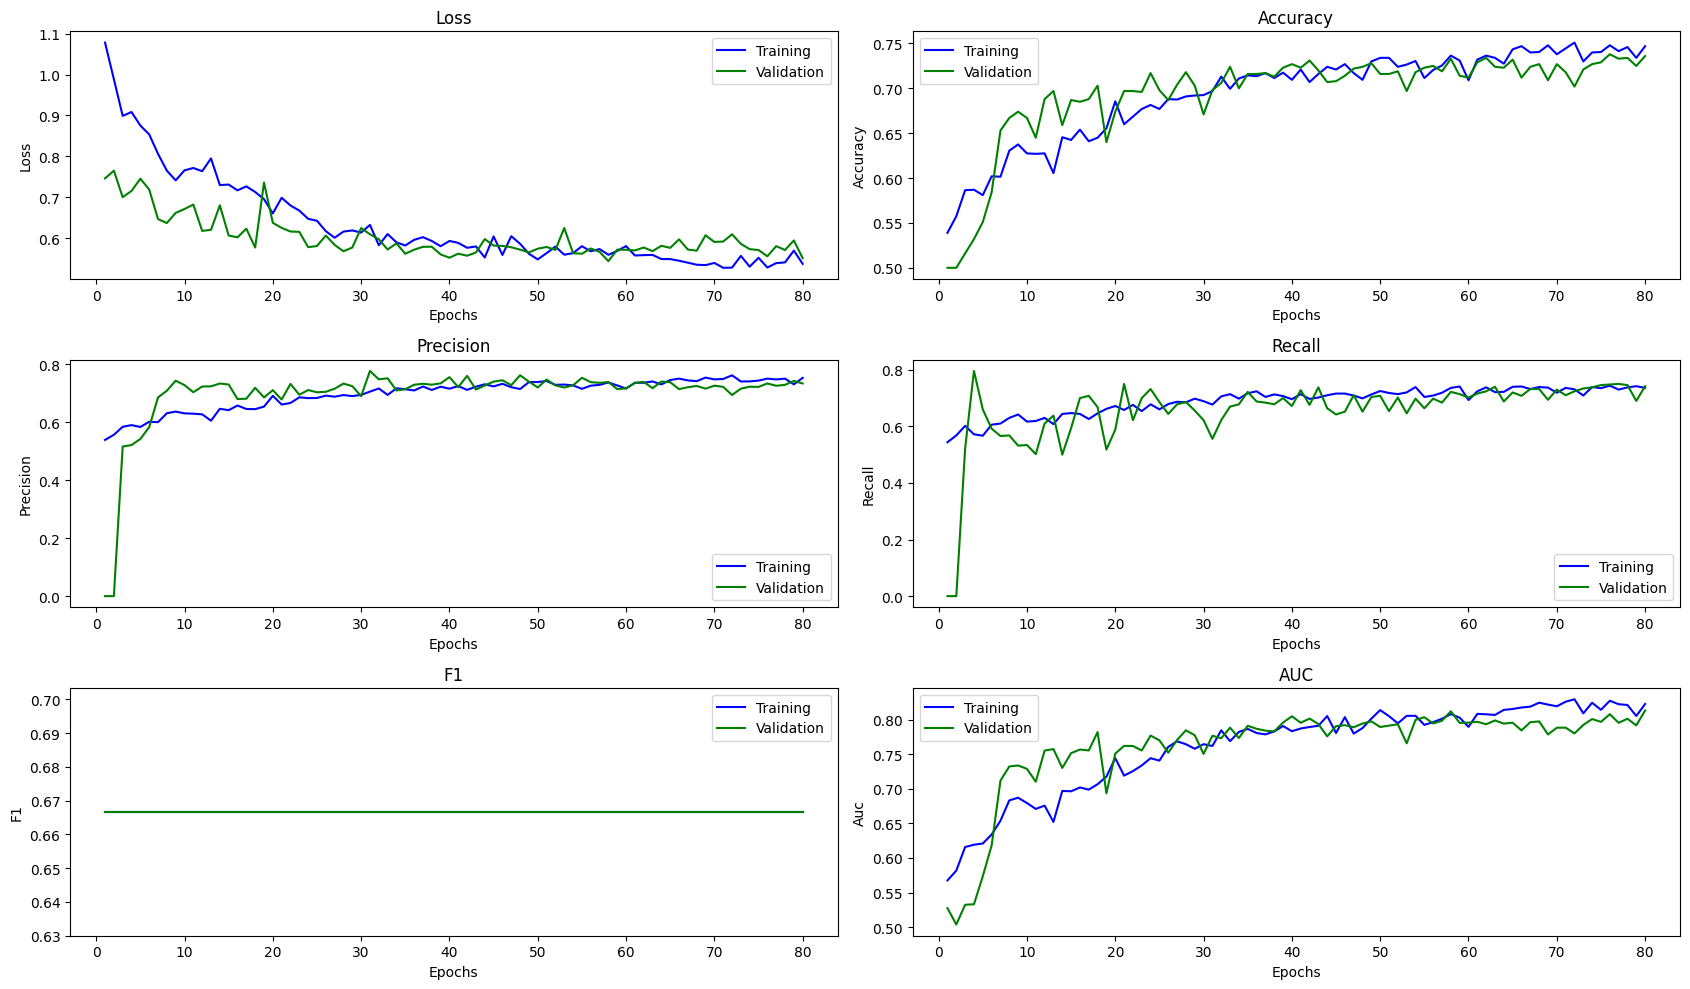

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found optimal threshold: 0.458 and accuracy: 0.739


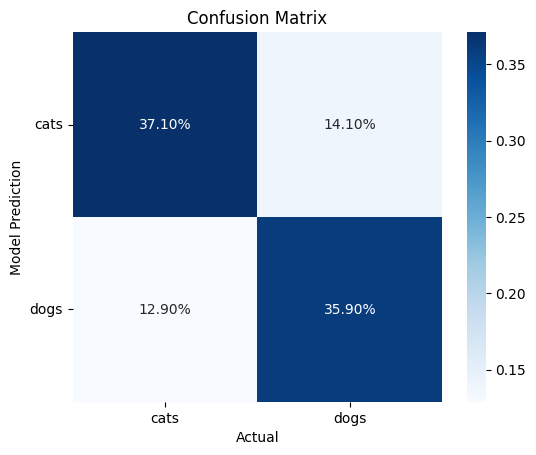

In [3]:
# hyperparameters
img_width = 150
img_height = 150
batch_size = 25
n_epochs = 80
steps_per_epoch = 2000 // batch_size
n_valid_steps = 1000 // batch_size
n_test_steps = 1000 // batch_size
learning_rate=1e-4

# prep input data
train_gen, valid_gen, test_gen = create_batch_generators(
    img_shape=(img_width, img_height),
    train_dir = os.path.join('data', 'dogs_cats', 'train'),
    valid_dir=os.path.join('data', 'dogs_cats', 'validation'),
    test_dir=os.path.join('data', 'dogs_cats', 'test'),
    batch_size=batch_size
)

# initilaize the CNN model
model_ref = models.Sequential()
model_ref.add(layers.Input(shape=(img_width, img_height, 3))) 

# feature learning part
model_ref.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_ref.add(layers.BatchNormalization())
model_ref.add(layers.MaxPooling2D((2, 2)))

model_ref.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_ref.add(layers.BatchNormalization())
model_ref.add(layers.MaxPooling2D((2, 2)))

model_ref.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))
model_ref.add(layers.BatchNormalization())
model_ref.add(layers.MaxPooling2D((2, 2)))

model_ref.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))
model_ref.add(layers.BatchNormalization())
model_ref.add(layers.MaxPooling2D((2, 2)))

# classification part
model_ref.add(layers.Flatten())
model_ref.add(layers.Dense(512, activation='relu'))
model_ref.add(layers.BatchNormalization())
model_ref.add(layers.Dropout(0.5))
model_ref.add(layers.Dense(1, activation='sigmoid'))

# compile the model
binary_accuracy = tf.keras.metrics.BinaryAccuracy(
    name="binary_accuracy", dtype=None, threshold=0.5
)

# prevent fluctuations et teh end of the training
reduce_learning_rate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-5
)

model_ref.compile(
    optimizer=Adam(learning_rate),
    loss='binary_crossentropy',
    metrics=[
        binary_accuracy,
        tf.keras.metrics.Recall(),
        tf.keras.metrics.AUC(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.F1Score()
    ]
)

# train the model
history = model_ref.fit(
    augment_training_data(train_gen),
    steps_per_epoch=steps_per_epoch,
    epochs=n_epochs,
    validation_data=valid_gen,
    validation_steps=n_valid_steps,
    callbacks=[reduce_learning_rate]
)

# save the trained model
save_model(model_ref, 'dogs_cats', 'reference.keras')

# evaluate the model in terms of performance petrics
eval_results = model_ref.evaluate(test_gen, steps=n_test_steps, return_dict=True)

print_performance_metrics({
    'Evaluation loss': eval_results['loss'],
    'Evaluation binary accuracy': eval_results['binary_accuracy'],
    'Evaluation recall':  eval_results['recall'],
    'Evaluation precision': eval_results['precision'],
    'Evaluation AUC': eval_results['auc'],
    'Evaluation F1':  eval_results['f1_score']
})

# visualize model performance during training
plot_performance_metrics(
    n_epochs, 3, 2, (17, 10), 
    formatters={'auc': str.upper},
    training_loss= history.history['loss'], 
    validation_loss=history.history['val_loss'], 
    training_accuracy=history.history['binary_accuracy'],
    validation_accuracy=history.history['val_binary_accuracy'],
    training_precision=history.history['precision'],
    validation_precision=history.history['val_precision'],
    training_recall=history.history['recall'],
    validation_recall=history.history['val_recall'],
    training_f1=history.history['f1_score'],
    validation_f1=history.history['val_f1_score'],
    training_auc=history.history['auc'],
    validation_auc=history.history['val_auc']
)

# reload image generators with disabled shuffling (reuqired to reproduce accuracy)
_, test_gen = create_batch_generators(
    img_shape=(img_width, img_height),
    train_dir = os.path.join('data', 'dogs_cats', 'train'),
    valid_dir = os.path.join('data', 'dogs_cats', 'validation'),
    test_dir=os.path.join('data', 'dogs_cats', 'test'),
    include_validation=False,
    batch_size=batch_size,
    shuffle=False
)

# compute the category separation threshold for testing set
test_predictions = model_ref.predict(test_gen, steps=n_test_steps, verbose=0)
test_labels = get_data_labels(test_gen, steps=n_test_steps)
optimal_thresh, optimal_acc  = find_optimal_threshold(test_labels, test_predictions, step=0.001)

# Compute the confusion matrix
print(f'Found optimal threshold: {optimal_thresh} and accuracy: {optimal_acc}')
test_labels = get_data_labels(test_gen, steps=n_test_steps)
test_predictions = model_ref.predict(test_gen, steps=n_test_steps, verbose=0)
bin_predictions = binarize_predictions(test_predictions, 0.5)
plot_confusion_matrix(test_labels, bin_predictions, class_labels=['cats', 'dogs'], normalize=True)

## 2.2 Hyperparameter tuning

In [ ]:
import keras_tuner

# hyperparameters
img_width = 150
img_height = 150
batch_size = 25
n_epochs = 80
steps_per_epoch = 2000 // batch_size
n_valid_steps = 1000 // batch_size
n_test_steps = 1000 // batch_size

# prep input data
train_gen, valid_gen, test_gen = create_batch_generators(
    img_shape=(img_width, img_height),
    train_dir = os.path.join('data', 'dogs_cats', 'train'),
    valid_dir=os.path.join('data', 'dogs_cats', 'validation'),
    test_dir=os.path.join('data', 'dogs_cats', 'test'),
    batch_size=batch_size
)

def build_model(hp) -> models.Sequential:

    # initilaize new CNN model
    model = models.Sequential()
    model.add(layers.Input(shape=(img_width, img_height, 3))) 

    # block 1
    model.add(layers.Conv2D(
        filters = hp.Choice('units_1', [64, 80]),
        kernel_size=(3, 3),
        activation='relu')
    )
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # block 2
    model.add(layers.Conv2D(
        filters = hp.Choice('units_2', [128, 160]),
        kernel_size=(3, 3),
        activation='relu')
    )
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    
    # block 3
    model.add(layers.Conv2D(
        filters = hp.Choice('units_3', [256]),
        kernel_size=(3, 3),
        activation='relu')
    )
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # block 4
    model.add(layers.Conv2D(
        filters = hp.Choice('units_4', [256]),
        kernel_size=(3, 3),
        activation='relu')
    )
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # classifier
    model.add(layers.Flatten())
    model.add(layers.Dense(
        units = hp.Choice('units_5', [256, 512]),
        activation='relu'
    ))
    model.add(layers.Dropout(rate=0.5))
    model.add(layers.Dense(1, activation='sigmoid'))

    learning_rate = 1e-5
    
    # compile the model 
    binary_accuracy = tf.keras.metrics.BinaryAccuracy(
        name="binary_accuracy", dtype=None, threshold=0.5
    )
    
    model.compile(
        optimizer=Adam(learning_rate),
        loss='binary_crossentropy',
        metrics=[
            binary_accuracy,
            tf.keras.metrics.Recall(),
            tf.keras.metrics.AUC()
        ]        
    )

    return model

build_model(keras_tuner.HyperParameters())

tuner = keras_tuner.BayesianOptimization(
    build_model,
    objective='val_binary_accuracy',
    overwrite=True,
    directory='tuning',
    project_name='hyperparam_tuning'
)

# optimisations that prevent fluctuations
# in validation loss at the end of training
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

tuner.search(
    augment_training_data(train_gen),
    epochs=80,
    validation_data=valid_gen,
    steps_per_epoch=steps_per_epoch,
    validation_steps=n_valid_steps,
    callbacks=[early_stopping]
)

# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

# Get the top 2 hyperparameters.
# best_hps = tuner.get_best_hyperparameters(5)
# # Build the model with the best hp.
# model = build_model(best_hps[0])
# # Fit with the entire dataset.
# x_all = np.concatenate((x_train, x_val))
# y_all = np.concatenate((y_train, y_val))
# # model.fit(x=x_all, y=y_all, epochs=1)

## 2.3 Final model re-training and testing

Found 3000 files belonging to 2 classes.


I0000 00:00:1731791524.717152   31138 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Epoch 1/100


I0000 00:00:1731791528.584737   31231 service.cc:148] XLA service 0x76f454002880 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731791528.584772   31231 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-11-16 22:12:08.787779: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731791529.064820   31231 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1731791536.130595   31231 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


120/120 ━━━━━━━━━━━━━━━━━━━━ 17s 60ms/step - auc: 0.5795 - binary_accuracy: 0.5667 - f1_score: 0.6769 - loss: 1.0530 - precision: 0.5775 - recall: 0.5682 - learning_rate: 1.0000e-04
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - auc: 0.5974 - binary_accuracy: 0.5626 - f1_score: 0.6823 - loss: 0.9537 - precision: 0.5817 - recall: 0.5540 - learning_rate: 1.0000e-04
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - auc: 0.6161 - binary_accuracy: 0.5772 - f1_score: 0.6798 - loss: 0.8817 - precision: 0.5926 - recall: 0.5743 - learning_rate: 1.0000e-04
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - auc: 0.6022 - binary_accuracy: 0.5726 - f1_score: 0.6811 - loss: 0.8973 - precision: 0.5899 - recall: 0.5659 - learning_rate: 1.0000e-04
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - auc: 0.6505 - binary_accuracy: 0.6137 - f1_score: 0.6775 - loss: 0.7943 - precision: 0.6241 - recall: 0.6205 - learning_rate: 1.0000e-04
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 60

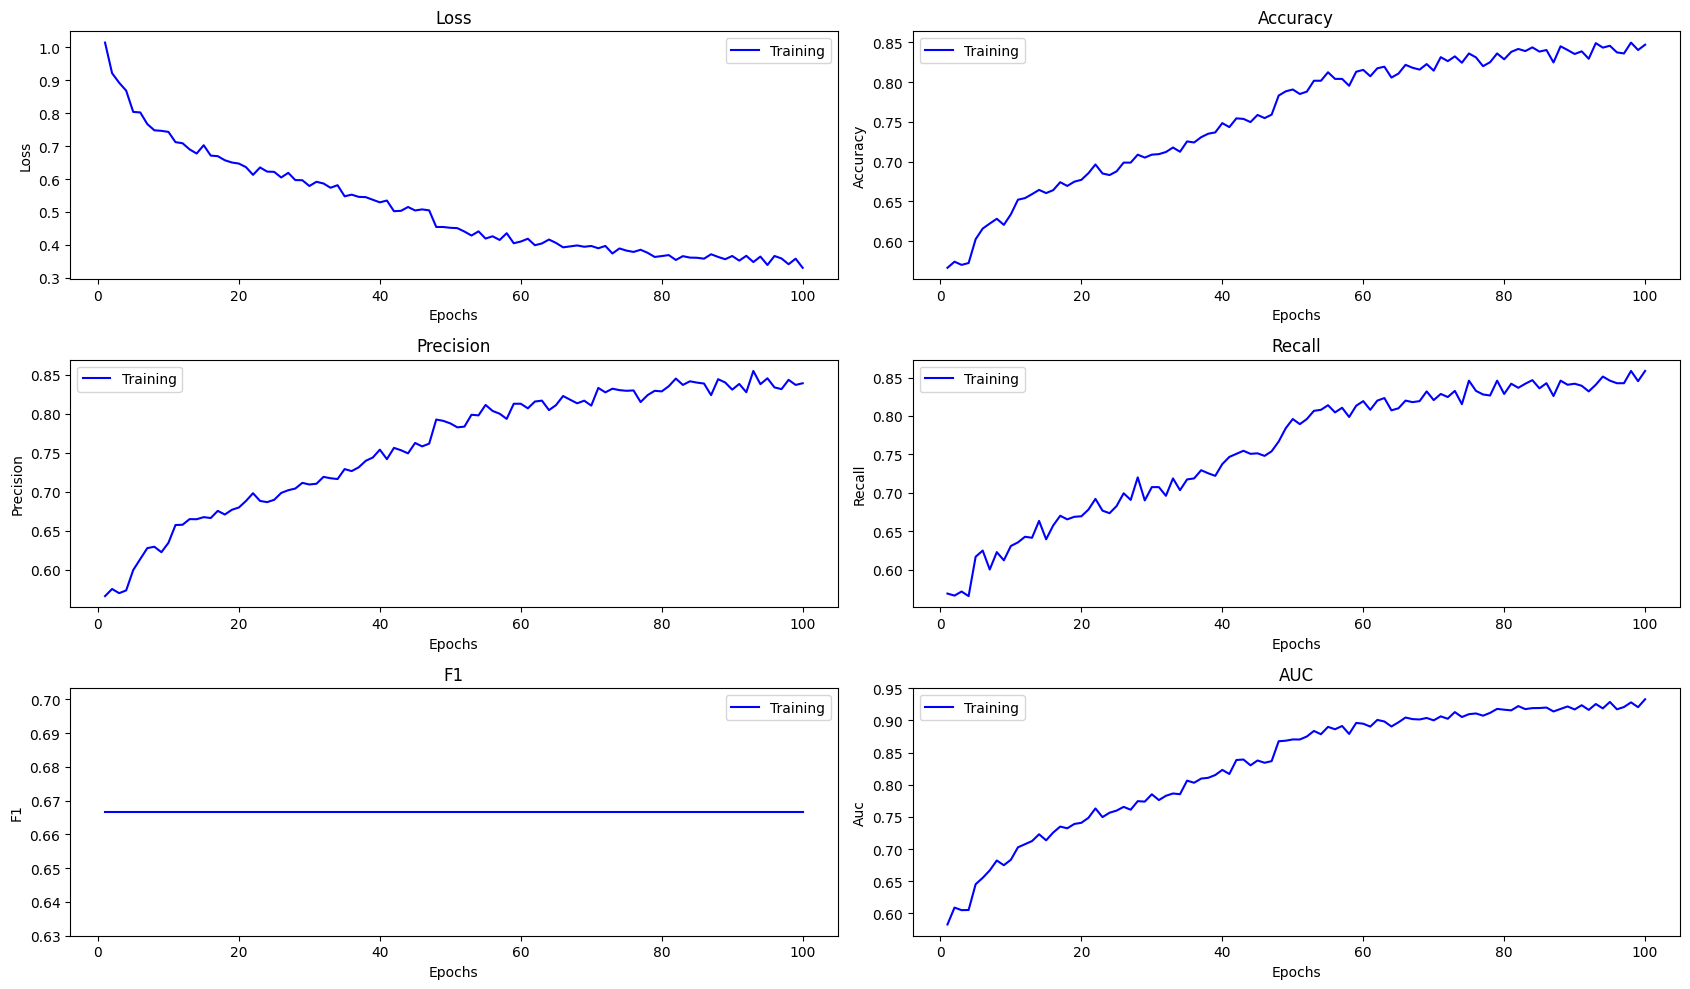

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found optimal threshold: 0.445 and accuracy: 0.826


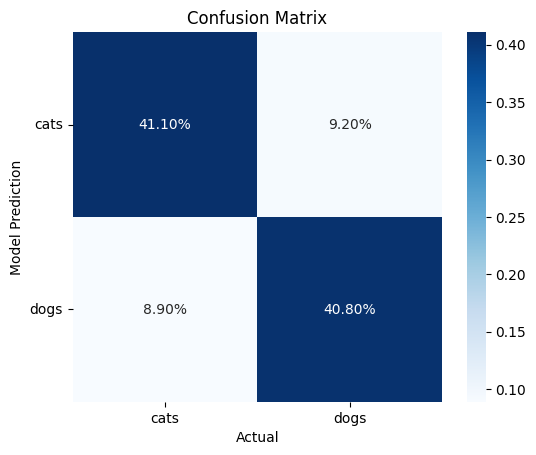

In [4]:
# hyperparameters
img_width = 150
img_height = 150
batch_size = 25
n_epochs = 100
steps_per_epoch = 3000 // batch_size
n_test_steps = 1000 // batch_size
learning_rate=1e-4

train_gen, test_gen = create_batch_generators(
    img_shape=(img_width, img_height),
    train_dir = os.path.join('data', 'dogs_cats', 'final_train'),
    test_dir=os.path.join('data', 'dogs_cats', 'test'),
    valid_dir=os.path.join('data', 'dogs_cats', 'validation'),
    include_validation=False,
    batch_size=batch_size,
    shuffle=True
)

# initilaize the CNN model
model_final = models.Sequential()
model_final.add(layers.Input(shape=(img_width, img_height, 3))) 

# feature learning part
model_final.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_final.add(layers.BatchNormalization())
model_final.add(layers.MaxPooling2D((2, 2)))

model_final.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_final.add(layers.BatchNormalization())
model_final.add(layers.MaxPooling2D((2, 2)))

model_final.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))
model_final.add(layers.BatchNormalization())
model_final.add(layers.MaxPooling2D((2, 2)))

model_final.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))
model_final.add(layers.BatchNormalization())
model_final.add(layers.MaxPooling2D((2, 2)))

# classification part
model_final.add(layers.Flatten())
model_final.add(layers.Dense(512, activation='relu'))
model_final.add(layers.BatchNormalization())
model_final.add(layers.Dropout(0.5))
model_final.add(layers.Dense(1, activation='sigmoid'))

# compile the model
binary_accuracy = tf.keras.metrics.BinaryAccuracy(
    name="binary_accuracy", dtype=None, threshold=0.5
)

# prevent fluctuations et teh end of the training
reduce_learning_rate = ReduceLROnPlateau(
    monitor='loss',
    factor=0.2,
    patience=5,
    min_lr=1e-5
)

model_final.compile(
    optimizer=Adam(learning_rate),
    loss='binary_crossentropy',
    metrics=[
        binary_accuracy,
        tf.keras.metrics.Recall(),
        tf.keras.metrics.AUC(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.F1Score()
    ]
)

# train the model
history = model_final.fit(
    augment_training_data(train_gen),
    steps_per_epoch=steps_per_epoch,
    epochs=n_epochs,
    callbacks=[reduce_learning_rate]
)

# save the trained model
save_model(model_final, 'dogs_cats', 'final.keras')

# evaluate the model in terms of performance petrics
eval_results = model_final.evaluate(test_gen, steps=n_test_steps, return_dict=True)

print_performance_metrics({
    'Evaluation loss': eval_results['loss'],
    'Evaluation binary accuracy': eval_results['binary_accuracy'],
    'Evaluation recall':  eval_results['recall'],
    'Evaluation precision': eval_results['precision'],
    'Evaluation AUC': eval_results['auc'],
    'Evaluation F1':  eval_results['f1_score']
})

# visualize model performance during training
plot_performance_metrics(
    n_epochs, 3, 2, (17, 10), 
    formatters={'auc': str.upper},
    training_loss= history.history['loss'], 
    training_accuracy=history.history['binary_accuracy'],
    training_precision=history.history['precision'],
    training_recall=history.history['recall'],
    training_f1=history.history['f1_score'],
    training_auc=history.history['auc'],
)

# reload image generators with disabled shuffling (reuqired to reproduce accuracy)
_, test_gen = create_batch_generators(
    img_shape=(img_width, img_height),
    train_dir = os.path.join('data', 'dogs_cats', 'train'),
    valid_dir = os.path.join('data', 'dogs_cats', 'validation'),
    test_dir=os.path.join('data', 'dogs_cats', 'test'),
    include_validation=False,
    batch_size=batch_size,
    shuffle=False
)

# compute the category separation threshold for testing set
test_predictions = model_final.predict(test_gen, steps=n_test_steps, verbose=0)
test_labels = get_data_labels(test_gen, steps=n_test_steps)
optimal_thresh, optimal_acc  = find_optimal_threshold(test_labels, test_predictions, step=0.001)

# Compute the confusion matrix
print(f'Found optimal threshold: {optimal_thresh} and accuracy: {optimal_acc}')
test_labels = get_data_labels(test_gen, steps=n_test_steps)
test_predictions = model_final.predict(test_gen, steps=n_test_steps, verbose=0)
bin_predictions = binarize_predictions(test_predictions, 0.5)
plot_confusion_matrix(test_labels, bin_predictions, class_labels=['cats', 'dogs'], normalize=True)

**Candidate model # 01**

Training results:
- Image size: 150 x 150
- 120 epochs
- Evaluation loss: 0.37
- Evaluation binary accuracy: 0.83
- Evaluation recall: 0.84
- Evaluation precision: 0.82
- Evaluation AUC: 0.92
- Evaluation F1: 0.67
- Testing accuracy: 0.812
  
**Candidate model # 02 - training results:**
- Image size: 150 x 150
- 100 epochs
- Evaluation loss: 0.37
- Evaluation binary accuracy: 0.85
- Evaluation recall: 0.90
- Evaluation precision: 0.81
- Evaluation AUC: 0.92
- Evaluation F1: 0.67
- Testing accuracy: 0.849